<a href="https://colab.research.google.com/github/winstonlingga/QM2Gr13/blob/main/QM2%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Oil Dependency on the Socio-Economic Development of Major Oil Exporters**



In [1]:
!pip install plotly
!pip install linearmodels
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.1 MB/s eta 0:00:00


1. Download Necessary Libraries and Upload Database Into a Data file
2. Use appropriate Data Imputation Techniques to Fill in Missing Data


In [2]:
!mkdir data
!mkdir data/grproject

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COUNTRY DATA NEW - COUNTRY DATA-2.csv to COUNTRY DATA NEW - COUNTRY DATA-2.csv


In [4]:
df = pd.read_csv('COUNTRY DATA NEW - COUNTRY DATA-2.csv', skiprows = 2)

df.columns = ['Country', 'Year', 'GDP_per_Capita', 'Oil_Rent',
              'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
              'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient', 'Oil_Export', 'Oil_Production']

In [5]:
# Convert 'Years' to integer and other numerical columns to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, making non-numeric values NaN
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')
df['Oil_Rent'] = pd.to_numeric(df['Oil_Rent'], errors='coerce')
df['Debt_to_GDP_Ratio'] = pd.to_numeric(df['Debt_to_GDP_Ratio'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')
df['Gini_Coefficient'] = pd.to_numeric(df['Gini_Coefficient'], errors='coerce')
df['Oil_Export'] = pd.to_numeric(df['Oil_Export'], errors='coerce')
df['Oil_Production'] = pd.to_numeric(df['Oil_Production'], errors='coerce')

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

In [6]:
#Data Imputation
df['Gini_Coefficient'] = df['Gini_Coefficient'].interpolate(method='linear')
# Replace missing values with the mean or median of the column
df['GDP_per_Capita'].fillna(df['GDP_per_Capita'].mean(), inplace=True)
df['Oil_Rent'].fillna(df['Oil_Rent'].mean(), inplace=True)
df['Debt_to_GDP_Ratio'].fillna(df['Debt_to_GDP_Ratio'].median(), inplace=True)

In [7]:
# Function to return the mode of a series, or NaN if the series is empty
def mode_or_nan(series):
    if len(series) > 0:
        return series.mode()[0]
    return pd.NA

# Assuming these are categorical or ordinal and have a common frequent value
df.groupby('Country')['Democracy_Index'].transform(lambda x: x.fillna(mode_or_nan(x)))
df.groupby('Country')['Civil_Rights_Freedom_Indexes'].transform(lambda x: x.fillna(mode_or_nan(x)))


0      4.50
1      4.50
2      4.50
3      4.50
4      4.50
       ... 
120    5.96
121    5.98
122    5.98
123    5.88
124    5.76
Name: Civil_Rights_Freedom_Indexes, Length: 125, dtype: float64

In [8]:
# Verify the changes
print(df.head())
print(df.isnull().sum())

        Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0  Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1  Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2  Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3  Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4  Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   

  Democracy_Index  Civil_Rights_Freedom_Indexes  Gini_Coefficient  Oil_Export  \
0             NaN                           NaN               NaN        6036   
1             NaN                           NaN               NaN        5285   
2             NaN                           NaN               NaN        6523   
3             NaN                           NaN               NaN        6813   
4             NaN                           NaN               NaN        7209   

   Oil_Production  
0            7889  
1   

In [9]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1    Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2    Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3    Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4    Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   
..            ...   ...             ...        ...                ...    ...   
120           UAE  2016     41054.53960  11.080756              19.40  0.870   
121           UAE  2017     43063.96750  13.498573              21.60  0.897   
122           UAE  2018     46722.26870  17.098994              20.90  0.909   
123           UAE  2019     45376.17080  15.681591              27.30  0.920   
124           UAE  2020     37629.17420  10.494098              36.90  0.912   

    Democracy_Index  Civil_Rights_Freed

As seen on the graph, the Gini Coefficienct for Saudi Arabia can not be interpolated as there is only one data point of reference, 2019. Thus this is a weakness.

In [10]:
#Data Cleaning
df = df.replace(r'^\s*$', np.nan, regex=True) #replace the empty string or strings composed with whitespace charater np.nan
numeric_c = [col for col in df.columns if col != 'Country' and col != 'Year']
df[numeric_c] = df[numeric_c].apply(pd.to_numeric, errors='coerce') # change to numeric
df[numeric_c] = df[numeric_c].replace(' ', 'NaN', regex=True)

In [11]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1    Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2    Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3    Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4    Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   
..            ...   ...             ...        ...                ...    ...   
120           UAE  2016     41054.53960  11.080756              19.40  0.870   
121           UAE  2017     43063.96750  13.498573              21.60  0.897   
122           UAE  2018     46722.26870  17.098994              20.90  0.909   
123           UAE  2019     45376.17080  15.681591              27.30  0.920   
124           UAE  2020     37629.17420  10.494098              36.90  0.912   

     Democracy_Index  Civil_Rights_Free

**Exploratory Data Analysis (EDA)**:
To find relations between the variables in this data frame, we are going to conduct exploratory data analysis using boxplots and histograms for numerical data, scatter plots for categorical data, and line plots to visualise how data changes over time.

In [12]:
sns.set()

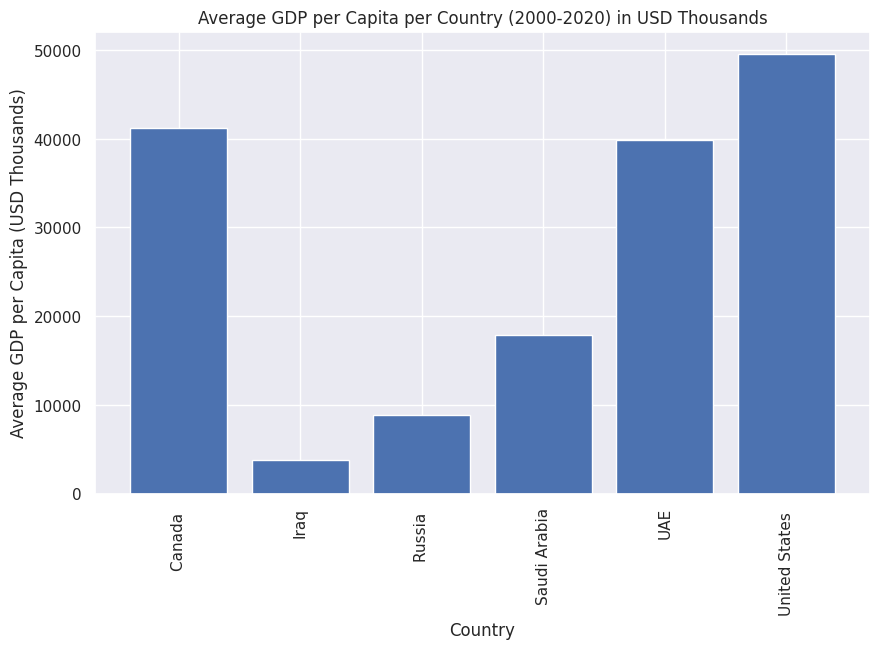

In [13]:
# Histogram
country_gdp = df.groupby('Country')['GDP_per_Capita'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(country_gdp['Country'], country_gdp['GDP_per_Capita'])
plt.title('Average GDP per Capita per Country (2000-2020) in USD Thousands')
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita (USD Thousands)')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()



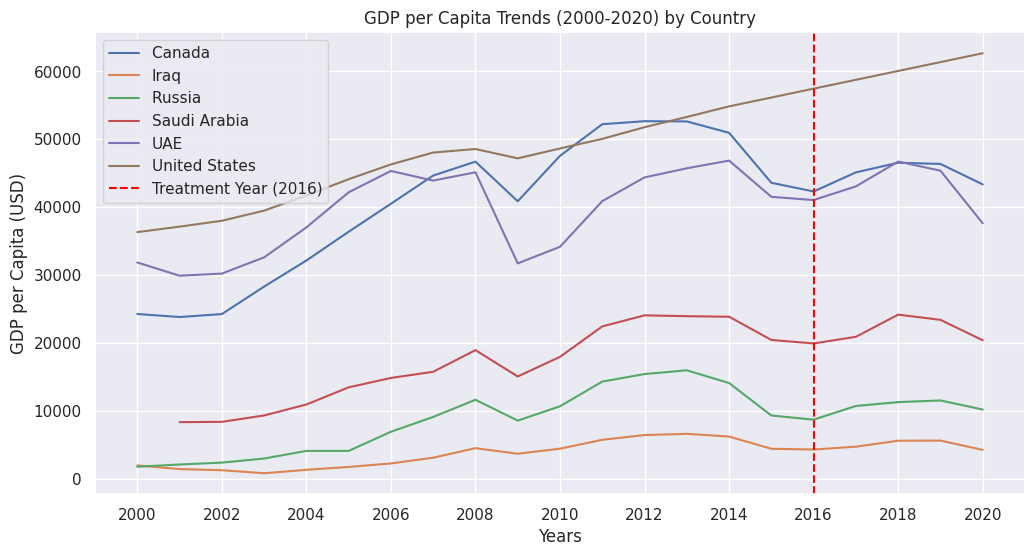

In [14]:
#Line Graph Plotting GDP Per Capita Trend Over Time
country_yearly_gdp = df.groupby(['Country', 'Year'])['GDP_per_Capita'].sum().reset_index()

plt.figure(figsize=(12, 6))

for country in country_yearly_gdp['Country'].unique():
    country_data = country_yearly_gdp[country_yearly_gdp['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP_per_Capita'], label=country)

# Add a vertical line at 2016 to indicate the treatment year for DiD Analysis
plt.axvline(x=2016, color='red', linestyle='--', label='Treatment Year (2016)')

plt.xticks(range(df['Year'].min(), df['Year'].max() + 1, 2))
plt.title('GDP per Capita Trends (2000-2020) by Country')
plt.xlabel('Years')
plt.ylabel('GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Line Graph Plotting GDP Per Capita Trend Over Time
fig = px.line(df, x='Year', y='GDP_per_Capita', color='Country',
              hover_data=['Country', 'Year', 'GDP_per_Capita'],
              labels={'GDP_per_Capita': 'GDP per Capita ($)'})

# Add a vertical line at 2016
fig.add_vline(x=2016, line_width=2, line_dash="dash", line_color="red")

fig.update_xaxes(range=[2000, 2020],  # Set the range of x-axis
                 dtick=2,
                 tickangle=-45,
                 tickfont=dict(size=10))

# Update layout and titles
fig.update_layout(
    title='GDP per Capita Trends (2000-2020) for Selected Countries',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)'
)

# Show the plot
fig.show()

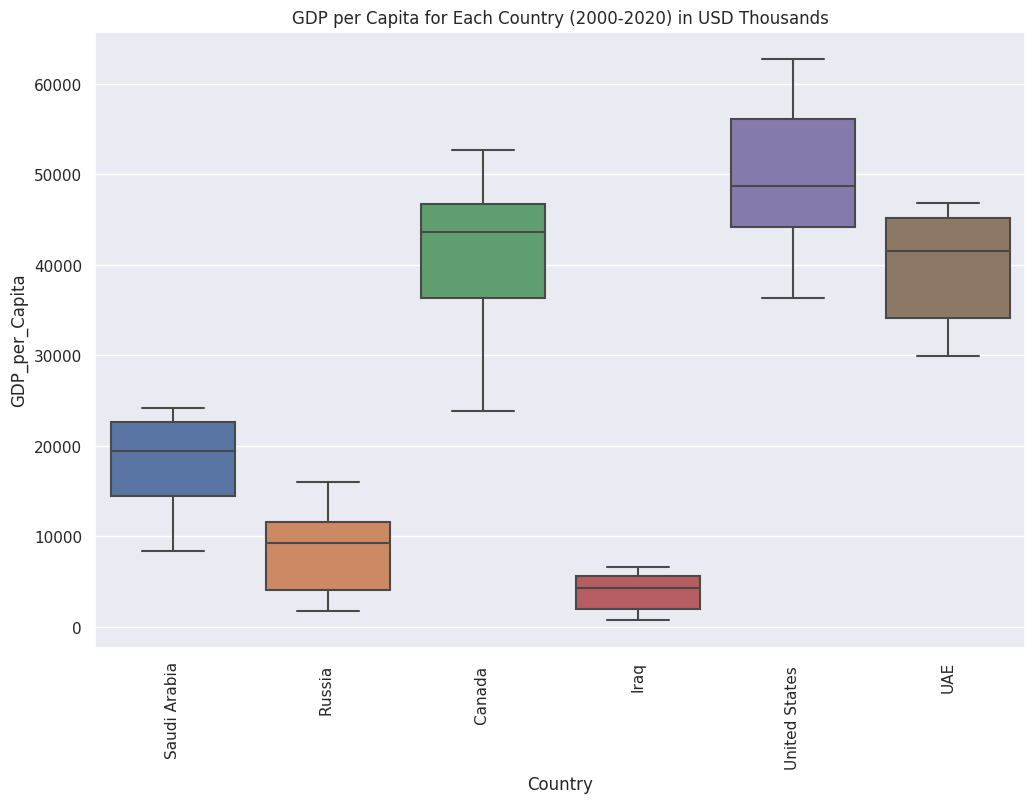

In [17]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='Country', y='GDP_per_Capita', data=df)
plt.title('GDP per Capita for Each Country (2000-2020) in USD Thousands')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()

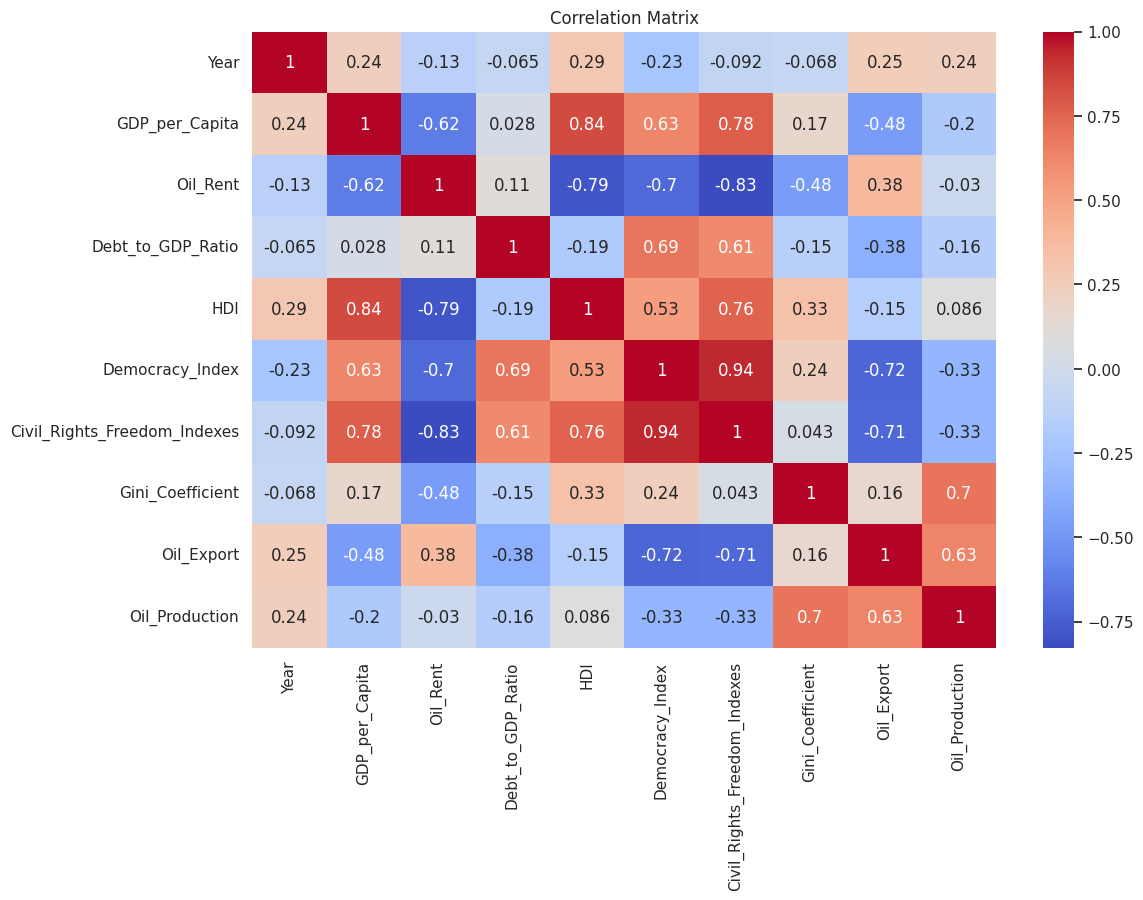

In [18]:
# Correlation matrix to understand how variables relate to each other
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Scatter plot to examine relationship between numerical variables
fig = px.scatter(df, x='GDP_per_Capita', y='Oil_Export', color='Country',
                 hover_data=['Country', 'Year', 'GDP_per_Capita', 'Oil_Export'],
                 labels={'GDP_per_Capita': 'GDP per Capita ($)', 'Oil_Export': 'Oil Export (bpd)'})

# Update layout and titles
fig.update_layout(
    title='GDP per Capita vs Oil Export Volume',
    xaxis_title='GDP per Capita (USD$)',
    yaxis_title='Oil Export (barrels per day)'
)
fig.show()

**Panel Regression Analysis**

**Panel Regrssion Analysis** is a combination of cross section data and time series, where the same unit cross section is measured at different times.

With the panel data, we could analysis a country over multiple periods; and cross-section data enables the comparison of different countries at a point in time, allowing for the assessment of differences and similarities across countries.

We use a **fixed effects model (FE)** for panel regression, as the unobserved country-specific effects are likely to be correlated with our independent variables - Oil Export.


$$\ Y_{it}=\alpha+\beta(Oil~Export)_{it}+\mu{i}+\gamma{t}+\epsilon_{it}$$

Where:
* $\ Y_{it}$: The dependent variable for country i at time t.

*  $\alpha_i$: The fixed effect for each entity (country) i, capturing all unobserved, time-invariant influences on the oil export that are unique to each country.

* $\ Oil Export_{it}$: The independent variable, which is the oil export value for country i at time t.

*  $\beta$: Coefficient of oil export, showing the impact of oil exports on the dependent variable.

* $\mu{i}$and $\gamma{t}$: Unobserved country/time specific effect.

* $\epsilon_{it}$: The error term for country i at time t, representing other unobserved factors affected by oil export.

After printing out the regression table, we also generate scatter plot with regression line for better visualisation.



In [20]:
#Panel Regression
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df=df.set_index(['Country','Year'])
dependent_vars = ['Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index', 'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient']

models = {}
# Loop through each dependent variable
for dv in dependent_vars:
    formula = f'{dv} ~ 1 + Oil_Export + EntityEffects'
    model = PanelOLS.from_formula(formula, data=df).fit()
    models[dv] = model

print(compare(models, stars=True))

                                                            Model Comparison                                                            
                            Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
----------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable               Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
Estimator                            PanelOLS         PanelOLS            PanelOLS                         PanelOLS             PanelOLS
No. Observations                          125              125                  84                               56                  108
Cov. Est.                          Unadjusted       Unadjusted          Unadjusted                       Unadjusted           Unadjusted
R-squared                              0.

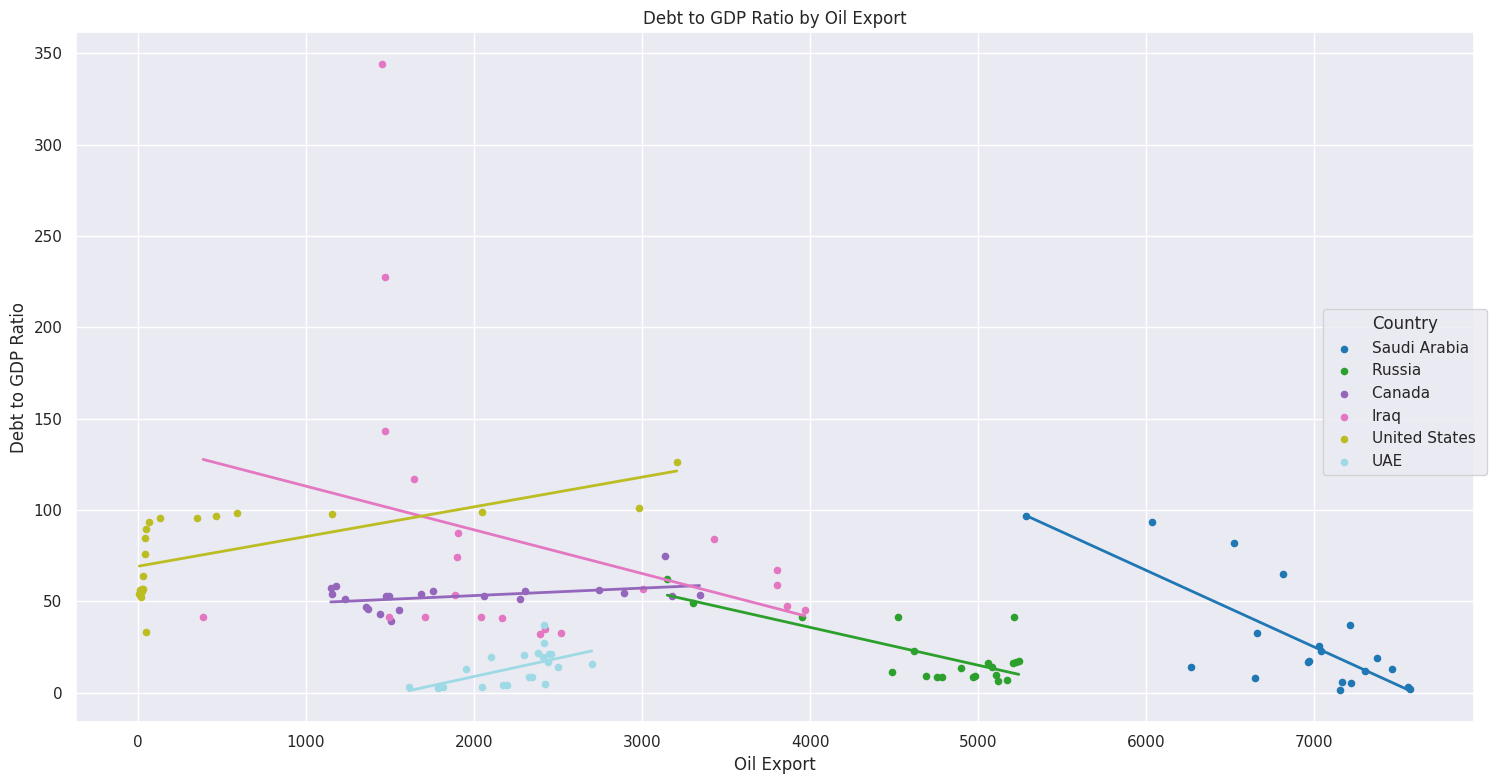

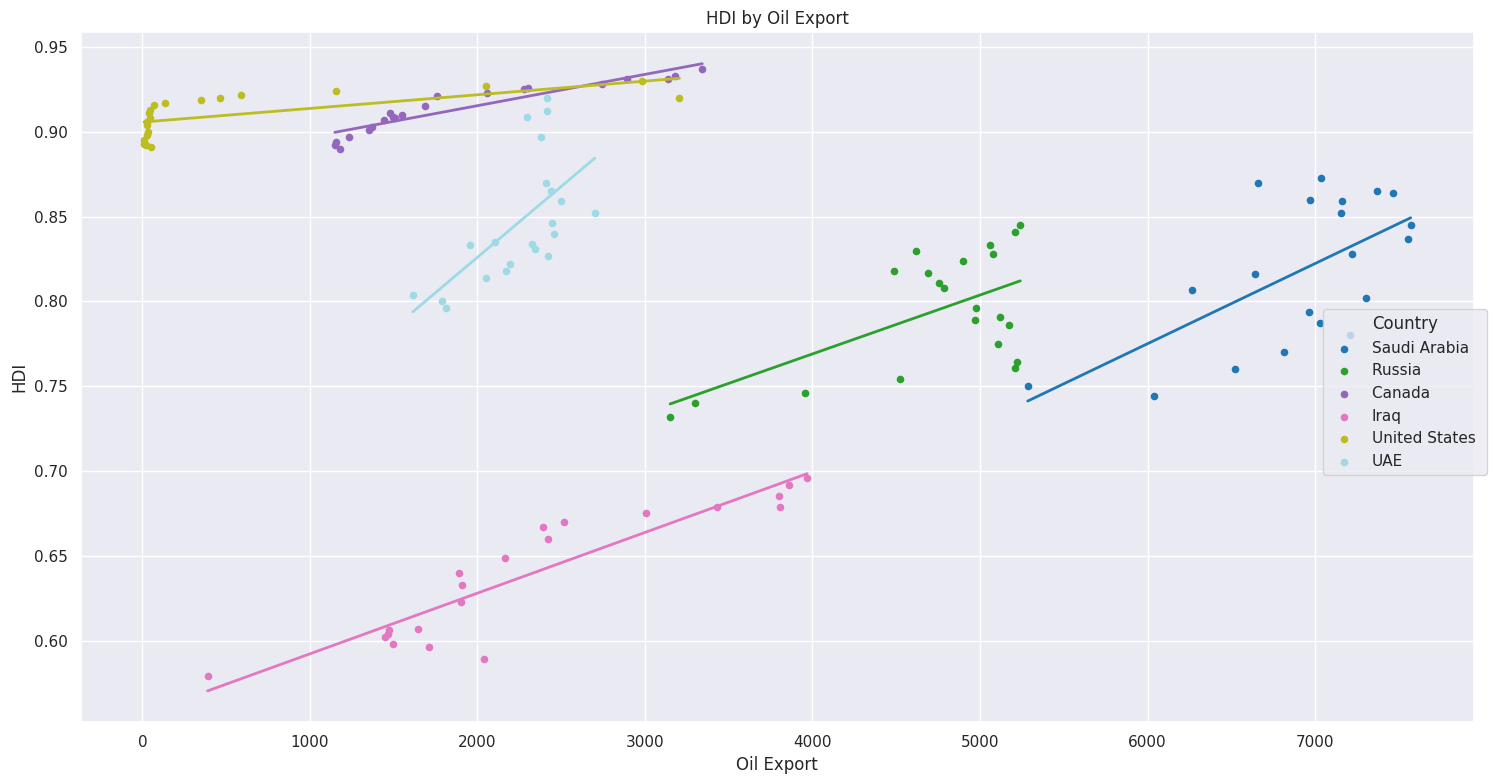

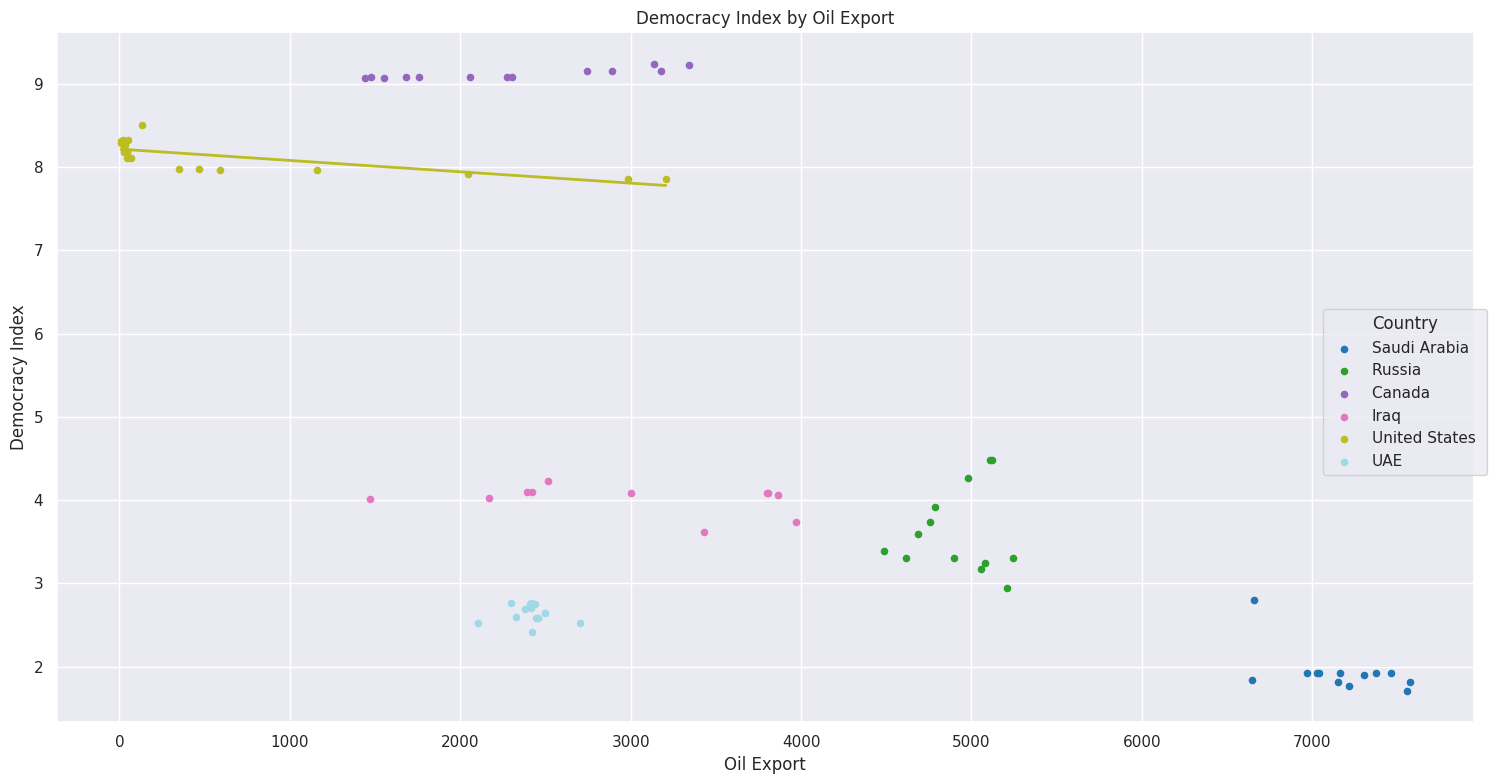

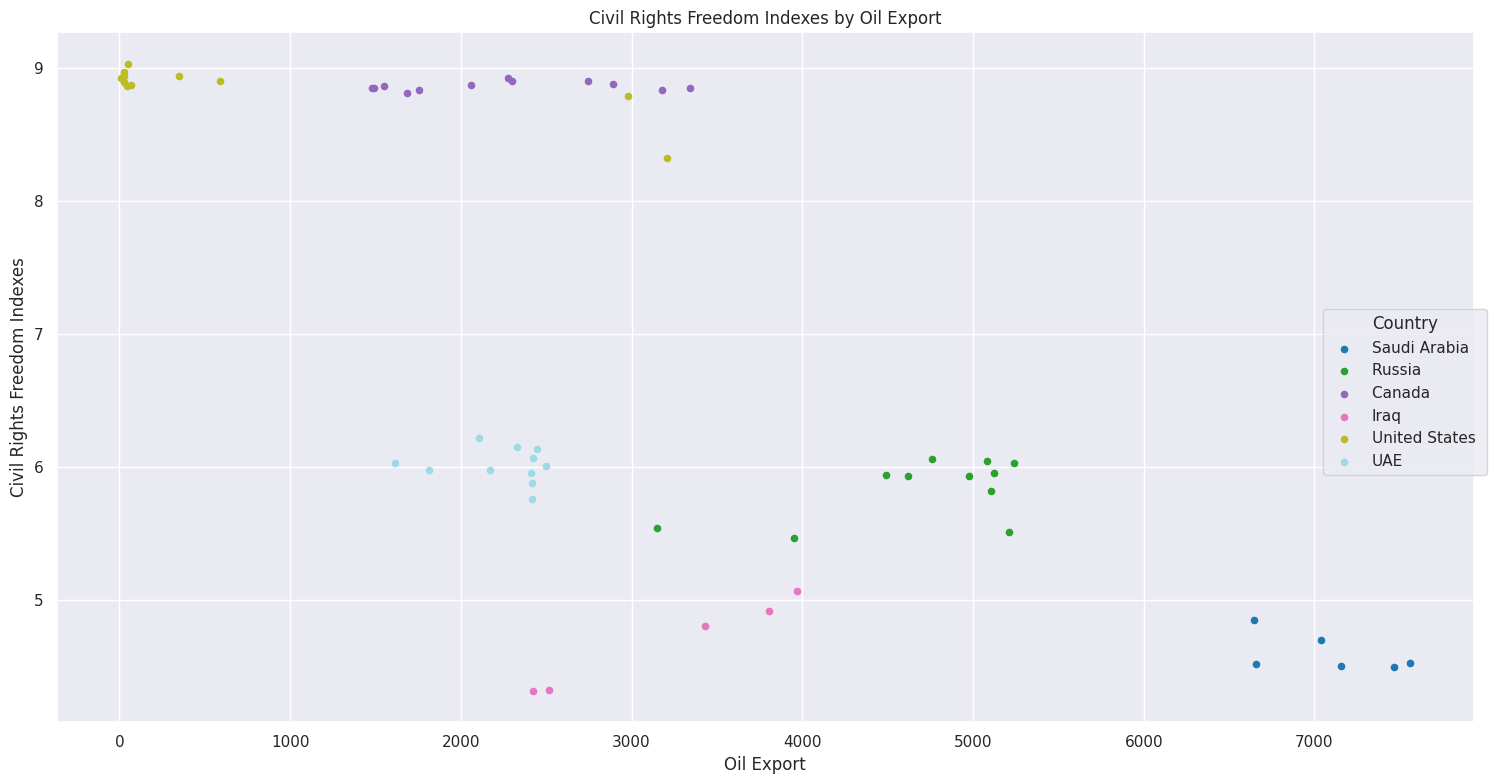

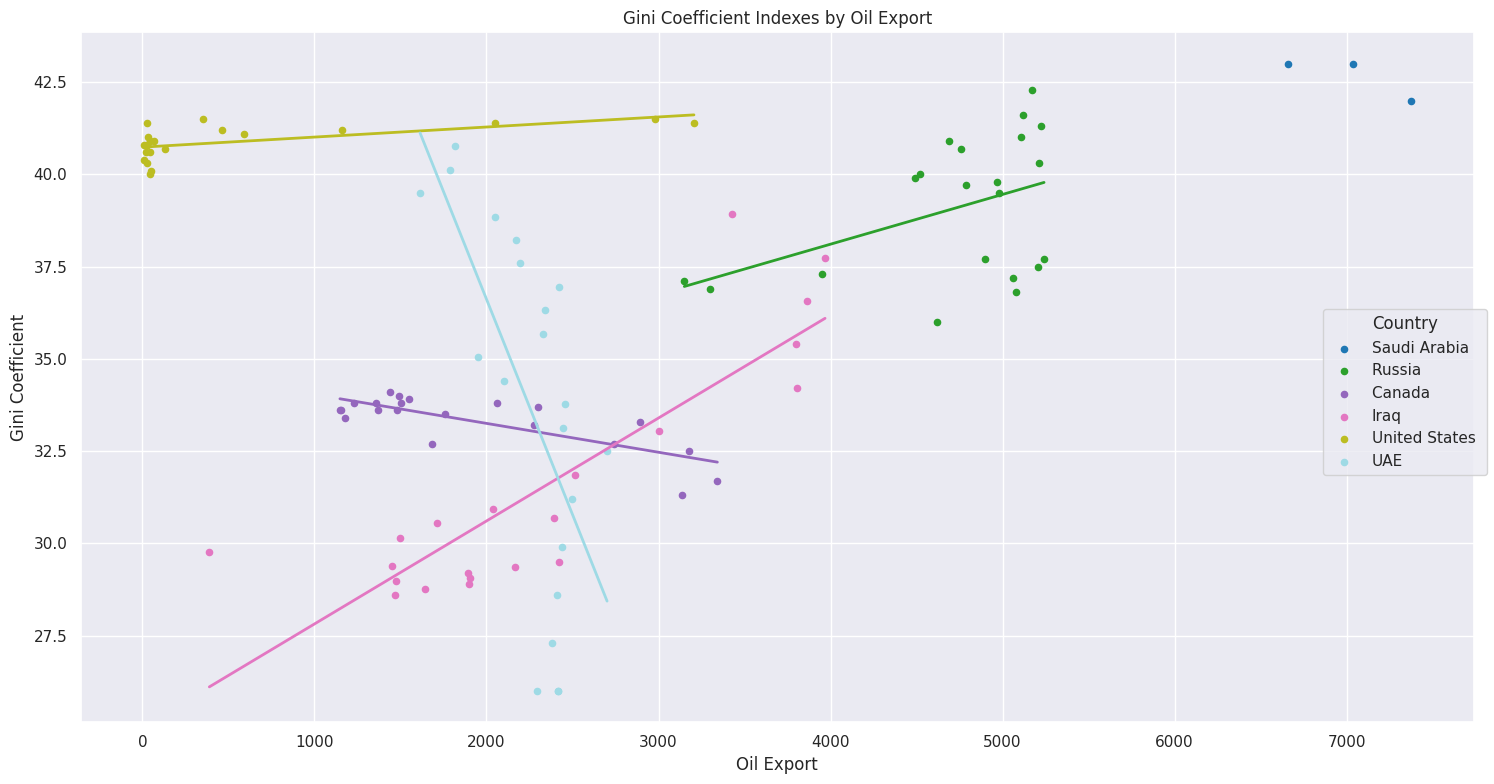

In [21]:
from scipy import stats

# Reset the index to access 'Country' and 'Year' for plotting.
df = df.reset_index()

# Define a colormap for the countries.
countries = df['Country'].unique()
color_map = plt.cm.tab20(np.linspace(0, 1, len(countries)))

# Set up a regression function
def plot_country_regression(ax, x, y, country_color):
    m, b = np.polyfit(x, y, 1)
    ax.plot(np.sort(x), m*np.sort(x) + b, color=country_color, linewidth=2)

# Create a function to plot seperate graphs
def plot_variable_against_oil_rent(variable, y_label, title):
  fig, axes = plt.subplots(figsize=(15, 8))
  for (color, country) in zip(color_map, countries):
    country_data = df[df['Country'] == country]
    axes.scatter(country_data['Oil_Export'], country_data[variable], color=color, label=country, s=20)
    plot_country_regression(axes, country_data['Oil_Export'], country_data[variable], color) # Plot the regression line
  axes.set_ylabel(y_label)
  axes.set_xlabel('Oil Export')
  axes.set_title(title)
# Add a legend
  handles, labels = axes.get_legend_handles_labels()
  fig.legend(handles, labels, loc='center right', ncol=1, title='Country')
# Plot the graph
  plt.tight_layout()
  plt.show()

# Plot each variable out
plot_variable_against_oil_rent('Debt_to_GDP_Ratio', 'Debt to GDP Ratio', 'Debt to GDP Ratio by Oil Export')
plot_variable_against_oil_rent('HDI', 'HDI', 'HDI by Oil Export')
plot_variable_against_oil_rent('Democracy_Index', 'Democracy Index', 'Democracy Index by Oil Export')
plot_variable_against_oil_rent('Civil_Rights_Freedom_Indexes', 'Civil Rights Freedom Indexes', 'Civil Rights Freedom Indexes by Oil Export')
plot_variable_against_oil_rent('Gini_Coefficient', 'Gini Coefficient', 'Gini Coefficient Indexes by Oil Export')

**Difference-in-Differenced Analysis** is a quasi-experimental design that makes use of longitudinal data from treatment and control groups to obtain an appropriate counterfactual to estimate a causal effect. DID is typically used to estimate the effect of a specific intervention or treatment (such as a passage of law, enactment of policy, or large-scale program implementation) by comparing the changes in outcomes over time between a population that is enrolled in a program (the intervention group) and a population that is not (the control group).


Treatment Event: 2016 OPEC Rebalancing Act

Despite a projected global oil glut, the Organisation of Petroleum Exporting Countries (OPEC) decided in November 2014 to maintain output. The end effect was a sharp drop in prices.

Two years later, on November 30, 2016, the group changed course and promised to cut OPEC's crude oil output by 1.2 million barrels per day (3.5 percent) over six months, to 32.5 million barrels per day, starting in January 2017. A minor price increase and some price stability were the results.

Although there might be a brief reprieve, additional oil production may begin rapidly  be stimulated by the price increase. The transient character is shown by a recent dramatic drop in prices brought on by larger than anticipated oil inventories in the United States.

This was one of the first times such a diverse group of major oil-producing countries, including both OPEC and non-OPEC members, came together to agree on production cuts. The agreement has had significant ramifications for global oil markets and the economies of the participating countries.

Conducting the DiD Analysis:
1. Defining the Treatment and Control Groups:

Treatment Group: Countries that became part of OPEC+ or significantly changed their engagement during the study period.
Control Group: Countries that did not join OPEC+ or whose membership status did not change significantly.
2. Setting the Time Frame:

Clearly define the "pre-treatment" and "post-treatment" periods based on the specific timing of the OPEC+ agreements or membership changes.

3. Statistical Modelling:

Use a regression model to estimate the treatment effect. The basic form of a DiD model is:

*Yit=α+β1⋅Postt+β2⋅Treatmenti+β3⋅(Postt×Treatmenti)+γXit+μi+λt+ϵit*

Where:
- *Yit*	is the outcome variable for country i at time t.

- *Postt* is a binary variable indicating the post-treatment period.

- *Treatmenti* is a binary variable indicating whether country i is in the treatment group.

- *Postt×Treatmenti* is the interaction term, whose coefficient (β3) estimates the DiD effect.

- *Xit* represents control variables.

- *μi* and *λt* represent country and time fixed effects, respectively.

- *ϵit* is the error term.

4. Checking Assumptions:

- Parallel Trends Assumption: Before the treatment, the treatment and control groups should have parallel trends in the outcome variable. This is crucial for the validity of the DiD estimator.
- No Interference: Ensure there's no spillover effect or interference between treatment and control groups.



In [26]:
#Treatment and Post-Treatment Indicator
# OPEC+ countries for treatment group
opec_plus = ['UAE', 'Saudi Arabia', 'Iraq']
df['treatment'] = df['Country'].isin(opec_plus).astype(int)

# Post-2016 as post-treatment period
df['post'] = (df['Year'] > 2016).astype(int)

#Interaction Term combining the treatment and post-treatment indicators
df['post_treatment'] = df['treatment'] * df['post']

In [27]:
# Parallel Trends Assumption Check

#Line Graph Plotting GDP Per Capita Trend Over Time with a line indicating treatment year of 2016
fig = px.line(df, x='Year', y='GDP_per_Capita', color='Country',
              hover_data=['Country', 'Year', 'GDP_per_Capita'],
              labels={'GDP_per_Capita': 'GDP per Capita ($)'})

# Add a vertical line at 2016
fig.add_vline(x=2016, line_width=2, line_dash="dash", line_color="red")

fig.update_xaxes(range=[2000, 2020],  # Set the range of x-axis
                 dtick=2,
                 tickangle=-45,
                 tickfont=dict(size=10))

# Update layout and titles
fig.update_layout(
    title='GDP per Capita Trends (2000-2020) for Selected Countries',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)'
)

# Show the plot
fig.show()

In [28]:
import statsmodels.formula.api as smf

# Filter the DataFrame to include only pre-treatment data
pre_treatment_data = df[df['Year'] < 2016]

# Regression with an interaction term between 'Year' and 'treatment'
model = smf.ols('GDP_per_Capita ~ Year * treatment', data=pre_treatment_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     7.332
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           0.000186
Time:                        21:58:36   Log-Likelihood:                -1055.2
No. Observations:                  95   AIC:                             2118.
Df Residuals:                      91   BIC:                             2129.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.829e+06   1.04e+06     -2.

**The Parallel Trends Assumption** implies that, in the absence of treatment, the average change over time in the outcome variable would have been the same for both the treatment and control groups.

The OLS Regression and the Line Chart above creates a statistical and visual check of the parallel trend assumption for the treatment group (UAE, Saudi Arabia, and Iraq) and control group (United States, Canada, and Russia).

The key coefficient to highlight here is the "Year:treatment (-660.5396)" coefficient which shows the difference in the annual change of GDP per Capita between the treatment and control groups. The p=0.375 indicates that this result is NOT statistically significant. Therefore, the trends in GDP per Capita over time between the treatment and control groups do not significantlly differ. **This supports the parallel trends assumption.**

However,

Due to the limitation of missing values and the usage of data imputation methods during the intital data processing, the database shows a potential existence of autocorrelation and multicollinearity in the model.
- Autocorrelation: this violates the OLS assumption of independent errors, which can lead to biased standard error and incorrect inferences.
- Multicollinearity: high multicollinearity can inflate the variance of the coefficient estimates

To overcome this limitation, we will use the Variance Inflation Factor (VIF) to identify variables contributing to multicollinearity, and if it is detected, we will use Princiapl Component Analysis (PCA). As for autocorrelation, we will use the Newey-West Standard Errors to adjust autocorrelation and heterokedasticity to provide a more accurate estimate of standard erros, leading to more reliable hypothesis tests.


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: VIF Test for Multicollinearity
numeric_cols = ['GDP_per_Capita', 'Oil_Rent','Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index', 'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient', 'Oil_Export', 'Oil_Production']



# Calculating VIF for each variable
vif_data = pd.DataFrame({'Variable': numeric_cols,
                         'VIF': [variance_inflation_factor(df[numeric_cols].values, i)
                                 for i in range(len(numeric_cols))]})

print("VIF Test Results:")
print(vif_data)

VIF Test Results:
                       Variable         VIF
0                GDP_per_Capita   24.912261
1                      Oil_Rent    7.037372
2             Debt_to_GDP_Ratio   10.669529
3                           HDI  484.679460
4               Democracy_Index  120.919678
5  Civil_Rights_Freedom_Indexes  910.004169
6              Gini_Coefficient  208.475738
7                    Oil_Export   13.676102
8                Oil_Production   16.734708


As shown by the VIF test, some social indicators such as HDI, Democracy Index, Civil Rights Freedom Indexes, and Gini Coefficient show high multicollinearity, meaning they are highly linearly dependent on other variables. After trying the PCA technique to solve this, we've decided to continue using the original variables as the PCA method reduces the multidimensional nature of the original social indicators data to a single dimension, which does not align with our aims and objectives.

**DiD Regression**

In [47]:
# Regression Model for DiD Analysis using GDP Per Capita as the Dependent Variable
formula_economic = 'GDP_per_Capita ~ treatment + post + post_treatment + HDI + Gini_Coefficient + Democracy_Index + Debt_to_GDP_Ratio + Oil_Rent + Civil_Rights_Freedom_Indexes + Oil_Export + Oil_Production'

# Fit the model
model = smf.ols(formula_economic, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     58.74
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           1.97e-18
Time:                        23:34:01   Log-Likelihood:                -437.50
No. Observations:                  45   AIC:                             899.0
Df Residuals:                      33   BIC:                             920.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

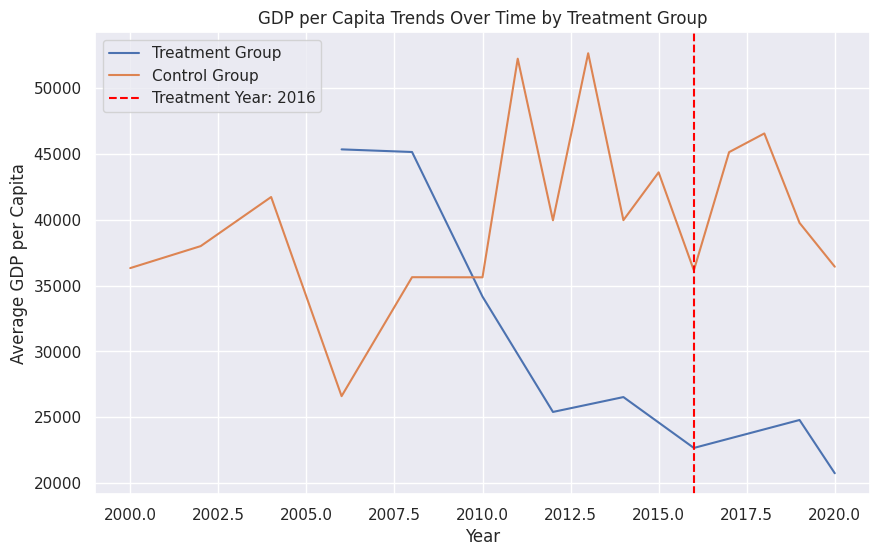

In [49]:
# Group the data by Year and Treatment status and calculate the mean GDP per Capita
treatment_group = df[df['treatment'] == 1].groupby('Year')['GDP_per_Capita'].mean()
control_group = df[df['treatment'] == 0].groupby('Year')['GDP_per_Capita'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(treatment_group.index, treatment_group.values, label='Treatment Group')
plt.plot(control_group.index, control_group.values, label='Control Group')

# Add a vertical line for the treatment year (2016)
plt.axvline(x=2016, color='red', linestyle='--', label='Treatment Year: 2016')

plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.title('GDP per Capita Trends Over Time by Treatment Group')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Regression Model for DiD Analysis using HDI as the Dependent Variable
formula_social = 'HDI ~ treatment + post + post_treatment + GDP_per_Capita + Gini_Coefficient + Democracy_Index + Debt_to_GDP_Ratio + Oil_Rent + Civil_Rights_Freedom_Indexes + Oil_Export + Oil_Production'

# Fit the model
model = smf.ols(formula_social, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     95.93
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           8.91e-22
Time:                        23:35:01   Log-Likelihood:                 129.53
No. Observations:                  45   AIC:                            -235.1
Df Residuals:                      33   BIC:                            -213.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

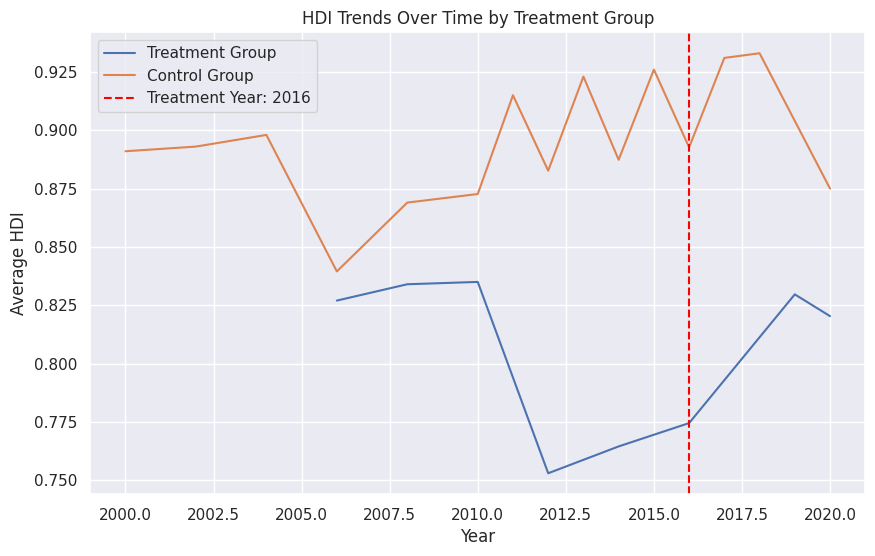

In [50]:
# Group the data by Year and Treatment status and calculate the mean HDI
treatment_group = df[df['treatment'] == 1].groupby('Year')['HDI'].mean()
control_group = df[df['treatment'] == 0].groupby('Year')['HDI'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(treatment_group.index, treatment_group.values, label='Treatment Group')
plt.plot(control_group.index, control_group.values, label='Control Group')

# Add a vertical line for the treatment year (2016)
plt.axvline(x=2016, color='red', linestyle='--', label='Treatment Year: 2016')

plt.xlabel('Year')
plt.ylabel('Average HDI')
plt.title('HDI Trends Over Time by Treatment Group')
plt.legend()
plt.grid(True)
plt.show()

Dependent Variable: HDI
- R-squared: 0.970 (97%, of the variance in HDI is explained by the model)
- Adjusted R-squared: 0.960 (Reflects the model's explanatory power after   adjusting for the number of predictors)
- F-statistic: 95.93 (Indicating the overall significance of the regression model)
- Prob (F-statistic): 8.91e-22 (Implies the model is statistically significant)

Coefficients Interpretation:
- Intercept (0.7087): The baseline level of HDI when all other variables are zero. Statistically significant (p < 0.001).
- Treatment (0.0500): Suggests a positive impact of the treatment on HDI, but it's marginally significant (p = 0.064).
- Post (0.0076): Indicates the change in HDI after the treatment period for the control group. Not significant (p = 0.420).
- Post_treatment (0.0312): Represents the DiD estimate. It suggests that the treatment led to an increase in HDI, and it's statistically significant (p = 0.029).
- GDP_per_Capita: Positively associated with HDI and statistically significant.
- Gini_Coefficient, Democracy_Index, and Civil_Rights_Freedom_Indexes: These variables show varying degrees of significance, with Gini_Coefficient being marginally significant.
- Debt_to_GDP_Ratio and Oil_Rent: Negatively associated with HDI and statistically significant.
- Oil_Export and Oil_Production: Both show a positive association with HDI. Oil_Production is statistically significant (p = 0.031), suggesting a positive impact on HDI, whereas Oil_Export is marginally significant (p = 0.083).

Model Fit and Diagnostics:
- Durbin-Watson: 0.896, indicating a low to moderate level of autocorrelation in the residuals.
- Omnibus and Jarque-Bera Tests: The low values suggest no significant deviations from normality in the residuals.
- Condition Number (1.22e+06): A high condition number points to potential multicollinearity issues, which might affect the precision of coefficient estimates.

Conclusions and Implications:
- The model demonstrates a strong fit with a high R-squared value, explaining a significant portion of the variability in HDI.
- The DiD estimate (post_treatment) is statistically significant, suggesting that the treatment event had a positive impact on HDI.
- The findings indicate that economic variables like GDP per capita, Debt to GDP ratio, and Oil Rent have significant associations with HDI.
- While there are signs of multicollinearity, the key variables of interest (treatment, post, post_treatment) show statistical significance, lending support to the impact of the treatment event on HDI.

In [ ]:
df['Country'] = df['Country'].str.strip() #removing space bafore and after the string

# Set the timeframe, control group and treatment group
df['post']=np.where(df['Year'] >= 2017,1,0) # 1 if year after the Rebalancing Act and 0 otherwise
df['treatment']=np.where((df['Country'] != 'United States') & (df['Country'] != 'Canada'),1,0) # 1 if country is OPEC+ before the Rebalancing Act and 0 otherwise
df['post_treatment']=df['post']*df['treatment']

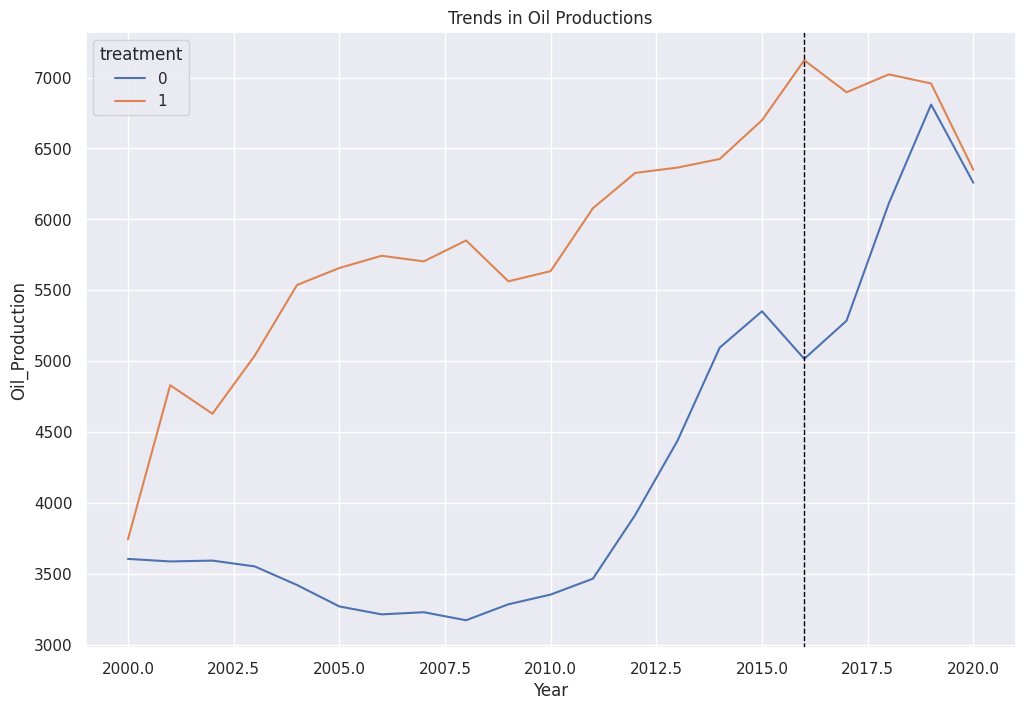

In [ ]:
# Plot trends over time by group
plt.figure(figsize=(12, 8))
sns.lineplot(data= df, x='Year', y='Oil_Production', hue='treatment', ci=None)

plt.axvline(x=2016, color='black', linestyle='--', lw=1)
plt.title('Trends in Oil Productions')
plt.show()
# 1 is OPEC+ and 0 is Not-OPEC+

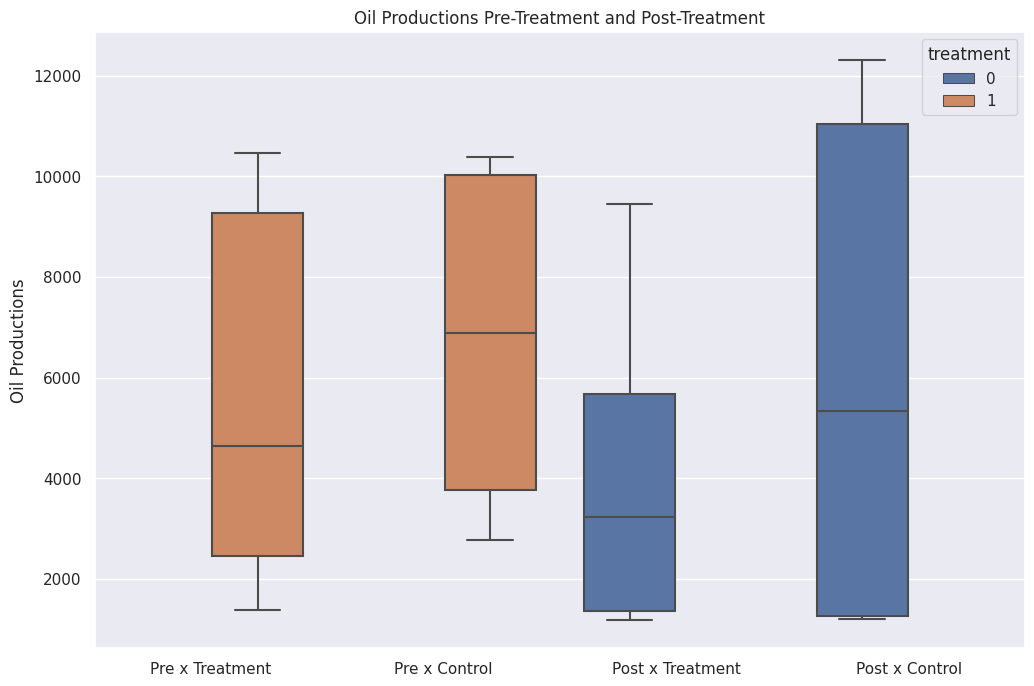

In [ ]:
df['category']=df['treatment'].astype(str)+df['post'].astype(str)

sns.boxplot(data=df, x='category', y='Oil_Production',hue='treatment').set_xticklabels(["Pre x Treatment", "Pre x Control", "Post x Treatment", "Post x Control"])
plt.title('Oil Productions Pre-Treatment and Post-Treatment')
plt.ylabel('Oil Productions')
plt.xlabel('')

plt.show()

In [ ]:
from statsmodels.formula.api import ols

# Run the OLS regression
model = ols('Oil_Production ~ post + treatment + post_treatment', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Oil_Production   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.877
Date:                Fri, 12 Jan 2024   Prob (F-statistic):             0.0109
Time:                        13:25:07   Log-Likelihood:                -1189.7
No. Observations:                 125   AIC:                             2387.
Df Residuals:                     121   BIC:                             2399.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3799.6176    573.633      6.